<a href="https://colab.research.google.com/github/deanzedd/Machine-Learning/blob/main/Gradient_Decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#vdu về 1 biến

*Ví dụ đơn giản về hàm 1 biến*

In [ ]:
import numpy as np
np.random.seed(3)

In [ ]:
def grad(x):
  return 2*x +5*np.cos(x)

def cost(x) :
  return x**2 + 5*np.sin(x)

def myGD1(x0,eta):
  x=[x0]
  for it in range(100):
    x_new=x[-1] -eta*grad(x[-1])
    if abs(grad(x_new)) < 1e-3:
      break
    x.append(x_new)
  return (x,it)

In [ ]:
import numpy as np
(x1,it1)=myGD1(-5,0.1)
(x2,it2)=myGD1(5,0.1)
print('Solution x1 = %f, cost = %f, after %d iterations'%(x1[-1],cost(x1[-1]),it1))
print('Solution x2 = %f, cost = %f, after %d iterations'%(x2[-1],cost(x2[-1]),it2))

Solution x1 = -1.110667, cost = -3.246394, after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, after 29 iterations


điểm tọa độ 5 di chuyển khó khăn hơn vì có 1 điểm xấp xỉ tọa độ 2.5 có slope gần bằng 0

#GD với nhiều biến

[3.0265274894628487, 3.9745254689434404]


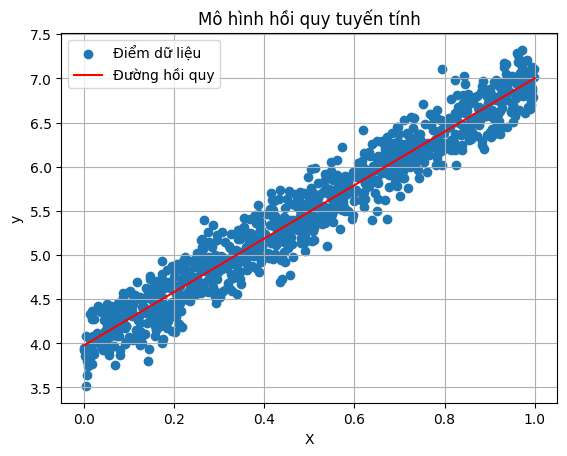

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(3)
X = np.random.rand(1000)
y = 4 + 3 * X + .2*np.random.randn(1000) #noise added
model = LinearRegression()
model.fit(X.reshape(-1,1),y.reshape(-1,1)) #biến X,y thành vector 1 cột duy nhất
W,b = model.coef_,model.intercept_
sol_sklearn = [W[0][0],b[0]] #dùng [W[0][0],b[0]] cho đẹp
print(sol_sklearn)
x=np.linspace(0,1,100)
y_pred=W[0][0]*x+b[0]


plt.scatter(X, y, label="Điểm dữ liệu") # Vẽ điểm dữ liệu
plt.plot(x, y_pred, color='red', label="Đường hồi quy") # Vẽ đường hồi quy

# 5. Thiết lập các thông tin cho đồ thị
plt.xlabel("X")
plt.ylabel("y")
plt.title("Mô hình hồi quy tuyến tính")
plt.legend()
plt.grid(True) # Hiển thị lưới

# 6. Hiển thị đồ thị
plt.show()




với linear reg

In [ ]:
def grad(w):
  N = Xbar.shape[0]
  return 1/N*Xbar.T.dot(Xbar.dot(w)-y)
  #Xbar là ma trận đầu vào,
  #.dot() là phép nhân ma trận
  #.T là chuyển vị ma trận

#maybe gọi là hàm lost
def cost(w):
  N = Xbar.shape[0]
  return .5/N*np.linalg.norm(y-Xbar.T.dot(w))**2
  #np.linalg.norm(y-Xbar.T.dot(w)) là tính l2 norm
  #**2 kia để mũ 2 l2 norm

In [ ]:
def myGD(w_init, grad, eta) :
  w = [w_init]
  for it in range(100):
    w_new = w[-1] - eta*grad(w[-1])
    if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
      break
    w.append(w_new)
  return w,it

In [ ]:
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one,X.reshape(-1,1)),axis=1)
w_init = np.array([[2],[1]])
w1,it1=myGD(w_init,grad,1)
print('Sol found by GD :w=',w1[-1].T,'after %d iterations.' %(it1+1))

Sol found by GD :w= [[5.46409154e+00 3.18565657e-03]
 [5.87451942e+00 3.43146990e-03]
 [5.00272846e+00 2.90933716e-03]
 ...
 [5.14087102e+00 2.99207345e-03]
 [3.98546838e+00 2.30008011e-03]
 [4.22857955e+00 2.44568416e-03]] after 100 iterations.


#GD với momentum

**Ý tưởng**:xuất phát từ vật lý thêm momen vào vector vận tốc giúp vượt local minum

In [ ]:
def GD_momentum(grad, theta_init, eta, gamma) :
  #suppose we want to store history of theta
  theta=[theta_init]
  v_old= np.zeros_like(theta_init)
  for it in range(100):
    v_new=gamma*v_old + eta*grad(theta[-1])
    theta_new = theta[-1] - v_new
    if np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3:
      break
    theta.append(theta_new)
    v_old=v_new
  return theta,it

In [ ]:
theta1,it1=GD_momentum(grad,w_init,1,0.9)
print('Sol found by GD :w=',theta1[-1].T,'after %d iterations.' %(it1+1))

Sol found by GD :w= [[5.46187068 0.01250702]
 [5.87226435 0.01354603]
 [5.00054607 0.01133906]
 ...
 [5.13867711 0.01168877]
 [3.98337081 0.00876384]
 [4.22646171 0.00937928]] after 100 iterations.


#Nesterov Accelrated Gradient(NAG)

Ý tưởng: momentum tốt khi vượt local minum NHƯNG khi đến gần no tối ưu thì hàm lắc lư lâu hội tụ -> Nester

khi cập nhật θ mới thì ta dùng gradient ở điểm θ mới luon  

In [ ]:
def GD_NAG(grad, theta_init, eta, gamma) :
  #suppose we want to store history of theta
  theta=[theta_init]
  v= [np.zeros_like(theta_init)]
  for it in range(100):
    v_new=gamma*v[-1] + eta*grad(theta[-1]-gamma*v[-1])
    theta_new = theta[-1] - v_new
    if np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3:
      break
    theta.append(theta_new)
    v.append(v_new)
  return theta,it

In [ ]:
theta1,it1=GD_NAG(grad,w_init,1,0.9)
print('Sol found by GD :w=',theta1[-1].T,'after %d iterations.' %(it1+1))

Sol found by GD :w= [[ 5.46679004e+00 -1.81738769e-03]
 [ 5.87742622e+00 -1.95758706e-03]
 [ 5.00519283e+00 -1.65978922e-03]
 ...
 [ 5.14340549e+00 -1.70697777e-03]
 [ 3.98741650e+00 -1.31230012e-03]
 [ 4.23065105e+00 -1.39534523e-03]] after 70 iterations.


KẾt quả thấy giảm 30 lần chạy


#Stochastic Gradient Decent(SGD)

Ở trên khi tối ưu hàm loss thì ta dùng toàn bộ dữ liệu khi algo mình dùng là Batch Gradient Descent(BGD) -> chi phí tính toán lớn

Có 1 cách đơn giản, use single random sample hoặc 1 mini-batch

Khi đó iteration SGD > BGD
và path của SGD nghe vẻ nh noise hơn

nhưng overrall: thời gian chạy SGD tối ưu hơn

do đó SGD phù hợp cho large data và online learning

In [ ]:
import numpy as np

class SGD:
  def __init__(self, lr=0.01, epochs=1000, batch_size=32, tol=1e-3):
    self.learning_rate = lr
    self.epochs = epochs
    self.batch_size = batch_size
    self.tolerance = tol
    self.weights = None
    self.bias = None
    np.random.seed(3)
    #thêm np.random.seed() nếu muốn cố định

  def predict(self, X) :
    return np.dot(X, self.weights) + self.bias

  def mean_squared_error(self, y_true, y_pred) :
    return np.mean((y_true-y_pred)**2)

  def gradient(self, X_batch, y_batch):
    y_pred = self.predict(X_batch)
    error = -y_batch + y_pred
    gradient_w = np.dot(X_batch.T, error)/X_batch.shape[0]
    gradient_b = np.mean(error)
    return gradient_w, gradient_b

  def fit(self, X, y):
    n_samples, n_features = X.shape #là 1 tuple, [0] là chỉ số lượng dữ lieu, [1] là thuộc tính

    self.weights = np.random.randn(n_features)
    print(self.weights)
    self.bias = np.random.randn()
    print(self.bias)

    for epoch in range(self.epochs):
      #tạo ra 1 mảng số nguyên từ 0 -> n_samples và sắp xếp ngẫu nhiên
      indices = np.random.permutation(n_samples)
      X_shuffled = X[indices]

      y_shuffled = y[indices]

      for i in range(0, n_samples, self.batch_size):
        X_batch = X_shuffled[i:i+self.batch_size]# lấy chỉ số từ i -> i +self.batch_size-1
        y_batch = y_shuffled[i:i+self.batch_size]

        gradient_w, gradient_b = self.gradient(X_batch, y_batch)
        self.weights -= self.learning_rate * gradient_w
        self.bias -= self.learning_rate * gradient_b

      if epoch%100 == 0:
        y_pred = self.predict(X)
        loss = self.mean_squared_error(y,y_pred)
        print(f"Epoch {epoch}: Loss = {loss}")

      if np.linalg.norm(gradient_w) < self.tolerance:
        print("converged")
        print(self.weights)
        break
    return self.weights, self.bias


In [ ]:
# Create random dataset with 100 rows and 5 columns
X =np.random.randn(100,5)
# create corresponding target value by adding random
# noise in the dataset
y = np.dot(X,np.array([1,2,3,4,5]))+np.random.randn(100)*0.1
# Create an instance of the SGD class
model = SGD(lr=0.01, epochs=5000, batch_size=32, tol=1e-2)
w,b=model.fit(X,y)

y_pred = w*X +b

[ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882 ]
-0.35475897926898675
Epoch 0: Loss = 73.82868392119856
Epoch 100: Loss = 0.09209588753823769
Epoch 200: Loss = 0.010568928422437365
Epoch 300: Loss = 0.009920273329187405
Epoch 400: Loss = 0.009905107568289478
Epoch 500: Loss = 0.009914084200451707
Epoch 600: Loss = 0.009897187650943889
Epoch 700: Loss = 0.00988729184166806
Epoch 800: Loss = 0.009893428864063948
Epoch 900: Loss = 0.00989134341772625
converged
[1.01758184 1.99057735 3.00169287 4.00523526 4.98444548]


**EPOCH**

1 epoch là 1 chu kỳ duyệt toàn bộ dữ liệu

trong 1 epoch ta có thể chia ra thành nhiều mini-batch với batch_size = k

Kết thúc một mini-batch ta sẽ cập nhật hệ số 1 lần

Nếu có N điểm dữ liệu -> có N/k mini-batch -> N/k lần cập nhật hệ số

bth batch_size sẽ là 2 mũ ?

BTH ta sẽ phải duyệt qua nhiều epoch để cập nhật hệ số mới cho bài toán tối ưu

**VD** Giả sử bạn có một tập dữ liệu huấn luyện gồm 1000 mẫu và bạn sử dụng kích thước mini-batch là 100. Điều này có nghĩa là mỗi epoch sẽ bao gồm 10 lần cập nhật trọng số (1000 mẫu / 100 mẫu mỗi mini-batch = 10). Nếu bạn huấn luyện mô hình trong 10 epoch, mô hình sẽ thực hiện tổng cộng 100 lần cập nhật trọng số.


**BATCH SIZE** là 1 siêu tham số ảnh hưởng đến

- tốc độ hội tụ của bt

- khả năng khái quát hóa nếu batch nhỏ thì dễ overfitting còn to quá dễ underfitting

ta nên chọn batch size là lũy thừa của 2 để tính nhanh

*ƯU điểm*:

**NHANH,lưu chữ bộ nhớ hiệu quả**: do mỗi vòng lặp ta chỉ lấy 1 data







*NHƯỢC điểm*:

**noisy update**: có phương sai cao do bốc điểm dữ liệu bất kì

**Slow Convergence**: yêu cầu nh vòng lặp

**Sensitivity to Learning Rate**

**Less Accurate**: bởi vì noisy update, SGD maybe ko hội tụ đến chính xác global minium

**NGUỒN THAM KHẢO**

https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

sách ML cơ bản

https://www.youtube.com/watch?v=K20lVDVjPn4

https://www.youtube.com/watch?v=SftOqbMrGfE


#ADAM

In [ ]:
import numpy as np

class ADAM:
  def __init__(self, lr=0.001, b1=0.9, b2=0.999, epochs=1000, batch_size=32, tol=1e-3):
    self.learning_rate=lr
    self.epochs = epochs
    self.batch_size = batch_size
    self.tolerance = tol
    self.beta1 = b1
    self.beta2 = b2
    self.m = 0
    self.v = 0
    self.weight = None
    self.bias=None
    self.m_w=None
    self.v_w=None
    self.m_b=None
    self.v_b=None
    #thêm np.random.seed() nếu muốn cố định
    np.random.seed(3)
    self.time_step=0

  def predict(self, X):
    return  np.dot(X, self.weight) + self.bias

  def mean_square_error(self, y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

  def gradient(self, X_batch, y_batch):
    y_pred = self.predict(X_batch)
    error = y_pred-y_batch
    gradient_w= np.dot(X_batch.T, error)/X_batch.shape[0]
    gradient_b = np.mean(error)
    return gradient_w, gradient_b

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weight = np.random.randn(n_features)
    print(self.weight)
    self.bias = np.random.randn()
    print(self.bias)

    for epoch in range(self.epochs):
      indicies = np.random.permutation(n_samples)

      X_shuffled = X[indicies]

      y_shuffled = y[indicies]

      for i in range(0, n_samples, self.batch_size):
        X_batch = X_shuffled[i:i+self.batch_size]
        y_batch = y_shuffled[i:i+self.batch_size]
        self.time_step+=1
        gradient_w, gradient_b = self.gradient(X_batch, y_batch)
        self.m = self.beta1*self.m + (1-self.beta1)*gradient_w
        self.v = self.beta2*self.v + (1-self.beta2)*(gradient_w**2)

        m_hat = self.m/(1-self.beta1**self.time_step)
        v_hat = self.v/(1-self.beta2**self.time_step)
        #m_hat = self.m
        #v_hat = self.v
        self.weight -= self.learning_rate*m_hat/(np.sqrt(v_hat+1e-8))
        self.bias -= self.learning_rate * gradient_b

      if epoch%100 == 0:
        y_pred = self.predict(X)
        loss = self.mean_square_error(y,y_pred)
        print(f"Epoch {epoch}: Loss = {loss}")

      if np.linalg.norm(gradient_w) < self.tolerance:

        print("converged")
        print(self.weight)
        break

    return self.weight, self.bias


In [ ]:
np.random.seed(3)

In [ ]:
X =np.random.randn(100,5)
# create corresponding target value by adding random
# noise in the dataset
y = np.dot(X,np.array([1,2,3,4,5]))+np.random.randn(100)*0.1
# Create an instance of the SGD class
np.random.seed(3)

print('ADAM PERFORMANT')
model = ADAM(lr=0.01, b1=0.9, b2=0.999,epochs=5000, batch_size=32, tol=1e-2)
w,b=model.fit(X,y)
print('SGD PERFORMANT')
model = SGD(lr=0.01, epochs=5000, batch_size=32, tol=1e-2)
w,b=model.fit(X,y)



ADAM PERFORMANT
[ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882 ]
-0.35475897926898675
Epoch 0: Loss = 80.32863617646456
Epoch 100: Loss = 16.309212057666684
Epoch 200: Loss = 1.925912969130793
Epoch 300: Loss = 0.10876092630561474
Epoch 400: Loss = 0.012852488902205734
converged
[1.00741796 1.99178412 2.9978946  3.98136412 4.97468129]
SGD PERFORMANT
[ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882 ]
-0.35475897926898675
Epoch 0: Loss = 71.42253816966208
Epoch 100: Loss = 0.023549767058441633
Epoch 200: Loss = 0.01083087946804925
Epoch 300: Loss = 0.01084541643310467
Epoch 400: Loss = 0.010826853213551863
Epoch 500: Loss = 0.010827632298138365
Epoch 600: Loss = 0.010841386054710783
Epoch 700: Loss = 0.010828526672187975
Epoch 800: Loss = 0.010842270103880985
Epoch 900: Loss = 0.0108458679979409
Epoch 1000: Loss = 0.01082551448488843
Epoch 1100: Loss = 0.010829035330384089
Epoch 1200: Loss = 0.010834932195952345
Epoch 1300: Loss = 0.010822837322976326
Epoch 1400: 